In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df1 = pd.read_csv('/kaggle/input/titanic//test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
import scipy.stats as stats
from scipy.stats import ttest_ind

In [10]:
x = pd.crosstab(df['Sex'],df['Survived'])

In [11]:
x.head()

Survived,0,1
Sex,,
female,81,233
male,468,109


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
def cleanData(data):
    
    # Data missing and categorical to drop
    data.drop(['Cabin','Name','Ticket'], axis=1, inplace=True)

    # Data missing Case2
    data['Age'] = data.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
    
    # FARE Data missing in test
    data['Fare'] = data.groupby(['Pclass','Sex'])['Fare'].transform(lambda x: x.fillna(x.median()))

    # Data missing Case3
    data.dropna(axis=0, subset=['Embarked'], inplace=True)
    
    # Categorical Data
    le = preprocessing.LabelEncoder()
    
    # Sex
    data['Sex'].replace({'male':0, 'female':1}, inplace=True)
    
    # Embarked
    data['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
    
    return data


In [14]:
df = cleanData(df)
df1 = cleanData(df1)


<AxesSubplot:xlabel='Age', ylabel='Fare'>

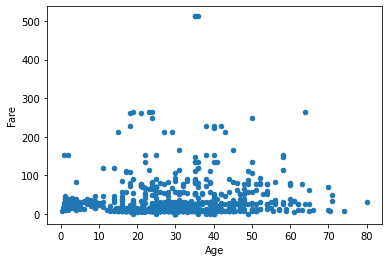

In [15]:
df.plot.scatter('Age','Fare')

In [16]:
df = df[df['Fare']<300]

In [17]:
df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  886 non-null    int64  
 1   Survived     886 non-null    int64  
 2   Pclass       886 non-null    int64  
 3   Sex          886 non-null    int64  
 4   Age          886 non-null    float64
 5   SibSp        886 non-null    int64  
 6   Parch        886 non-null    int64  
 7   Fare         886 non-null    float64
 8   Embarked     886 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-n

In [18]:
x = pd.get_dummies(df.drop('Survived', axis=1))
y = df['Survived']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=418, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logreg = LogisticRegression(random_state=42, solver='liblinear', max_iter = 10000)

In [23]:
logreg.fit(train_x,train_y)

LogisticRegression(max_iter=10000, random_state=42, solver='liblinear')

In [24]:
pred = logreg.predict(test_x)

In [25]:
predict = logreg.predict(pd.get_dummies(df1))

In [26]:
logreg.score(test_x,test_y)

0.7918660287081339

In [27]:
output = pd.DataFrame({'PassengerId': df1.PassengerId, 'Survived': predict})

In [28]:
output.to_csv('my_submission.csv', index=False)
print("Submission saved")

Submission saved
